 # Bitcoin Analysis
 1. What days of the week have the highest highs, and the lowest lows?
 2. What time of day do highs and lows of the day occur?

In [1]:
# Import libraries
import requests
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Access Cryptowatch api and retrieve data summary
kraken_url = 'https://api.cryptowat.ch/markets/kraken/btcusd/summary'
resp = requests.get(kraken_url)
resp.json()

{'result': {'price': {'last': 6862.4,
   'high': 6985,
   'low': 6626.8,
   'change': {'percentage': 0.0114224233223776, 'absolute': 77.5}},
  'volume': 5020.60138671,
  'volumeQuote': 34624631.720012955},
 'allowance': {'cost': 1689225,
  'remaining': 3923980357,
  'remainingPaid': 0,
  'upgrade': 'Upgrade for a higher allowance, starting at $15/month for 16 seconds/hour. https://cryptowat.ch/pricing'}}

In [3]:
# Get historic data from OHLC (open high low close)
kraken_data = 'https://api.cryptowat.ch/markets/kraken/btcusd/ohlc'
resp = requests.get(kraken_data)
doc = resp.json()

 Each value is a list that contains:
 - Timestamp (expressed as unix epoch)
 - Open Price
 - High Price
 - Low Price
 - Close Price
 - Volume
 - Not used

In [5]:
# List of periods
periods = {
    '60': '1m',  # 1 Minute
    '180': '3m', # 3 Minutes
    '300': '5m',
    '900': '15m',
    '1800': '30m',
    '3600': '1h', # 1 Hour
    '7200': '2h',
    '14400': '4h',
    '21600': '6h',
    '43200': '12h',
    '86400': '1d', # 1 Day
    '259200': '3d',
    '604800': '1w', # 1 Week
}

In [6]:
# Looking at 1 week periods
week = '604800'
params = {'periods': week}
resp = requests.get(kraken_data, params)
resp.ok

True

In [7]:
data = resp.json() # convert json to python data

In [8]:
df = pd.DataFrame(
    data['result'][week], columns=
    ['CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'])
df.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
0,1381968000,125.85000,153.00000,125.8500,138.09000,42.634753,0.0
1,1382572800,138.09000,203.45000,137.5200,203.45000,171.619985,0.0
2,1383177600,203.45000,207.30246,169.9201,203.77000,242.176755,0.0
3,1383782400,203.77000,269.42566,199.0000,263.73672,198.738897,0.0
4,1384387200,263.73672,500.00000,262.8628,398.00000,194.705865,0.0


In [9]:
# drop NA column
df.drop(columns=['NA'], inplace=True)
df.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
0,1381968000,125.85000,153.00000,125.8500,138.09000,42.634753
1,1382572800,138.09000,203.45000,137.5200,203.45000,171.619985
2,1383177600,203.45000,207.30246,169.9201,203.77000,242.176755
3,1383782400,203.77000,269.42566,199.0000,263.73672,198.738897
4,1384387200,263.73672,500.00000,262.8628,398.00000,194.705865


In [11]:
df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
df.set_index(df['CloseTime'], inplace=True)
df.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,,
2013-10-17,2013-10-17,125.85000,153.00000,125.8500,138.09000,42.634753
2013-10-24,2013-10-24,138.09000,203.45000,137.5200,203.45000,171.619985
2013-10-31,2013-10-31,203.45000,207.30246,169.9201,203.77000,242.176755
2013-11-07,2013-11-07,203.77000,269.42566,199.0000,263.73672,198.738897
2013-11-14,2013-11-14,263.73672,500.00000,262.8628,398.00000,194.705865


## Initial plot of weekly close price

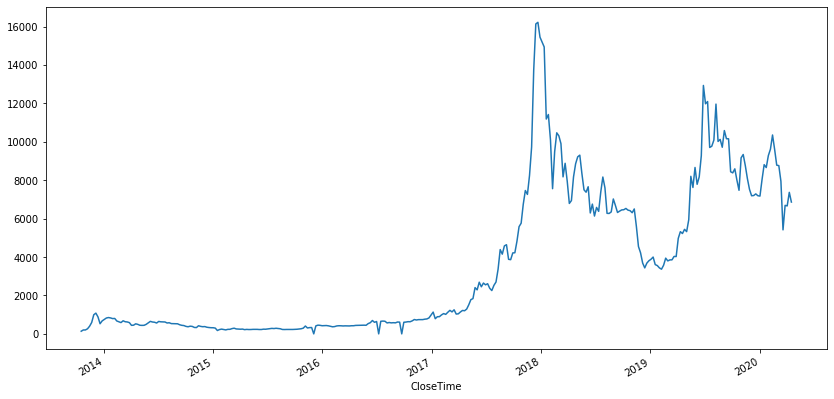

In [12]:
df['ClosePrice'].plot(figsize=(14,7))

## Question 1: What day of the week has the highest close price?

In [13]:
# Import kraken data with days as period
day = '86400'
day_params = {'periods': day}
resp = requests.get(kraken_data, day_params)
resp.ok

True

In [15]:
data = resp.json()
day_df = pd.DataFrame(data['result'][day], columns=
    ['CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'])
day_df.drop(columns=['NA'], inplace=True)
day_df['CloseTime'] = pd.to_datetime(day_df['CloseTime'], unit='s')
day_df.set_index('CloseTime', inplace=True)
day_df.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2013-10-08,123.61,123.61000,123.61,123.61,0.1000
2013-10-09,123.61,124.19000,123.90,124.18,3.9916
2013-10-10,124.18,124.01687,123.84,123.84,2.8230
2013-10-11,123.84,125.86000,125.85,125.86,2.0000
2013-10-13,125.86,127.50000,127.00,127.00,4.0000


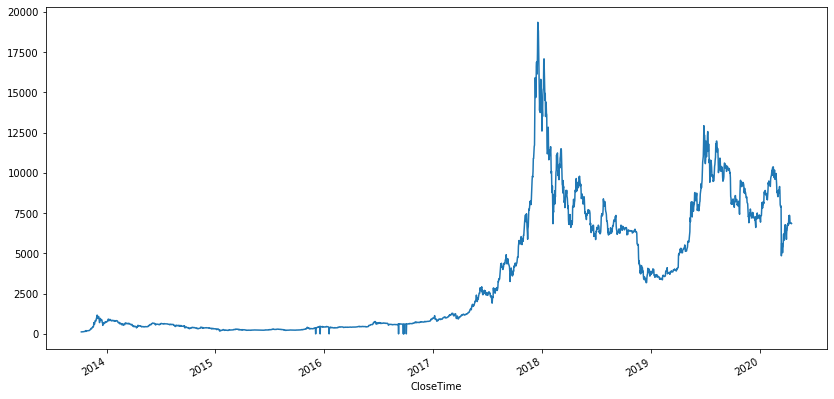

In [16]:
day_df['ClosePrice'].plot(figsize=(14,7))

In [21]:
daily_price = day_df[['ClosePrice']].copy()
daily_price.head()

,ClosePrice
CloseTime,
2013-10-08,123.61
2013-10-09,124.18
2013-10-10,123.84
2013-10-11,125.86
2013-10-13,127.00


## Calculate daily rolling mean over 90 days

In [22]:
daily_price['RollingMean'] = daily_price['ClosePrice'].rolling(90).mean()
daily_price[95:99]

,ClosePrice,RollingMean
CloseTime,,
2014-01-13,860.00000,601.873454
2014-01-14,835.00000,609.644676
2014-01-15,831.00000,617.390456
2014-01-16,850.00364,625.300608


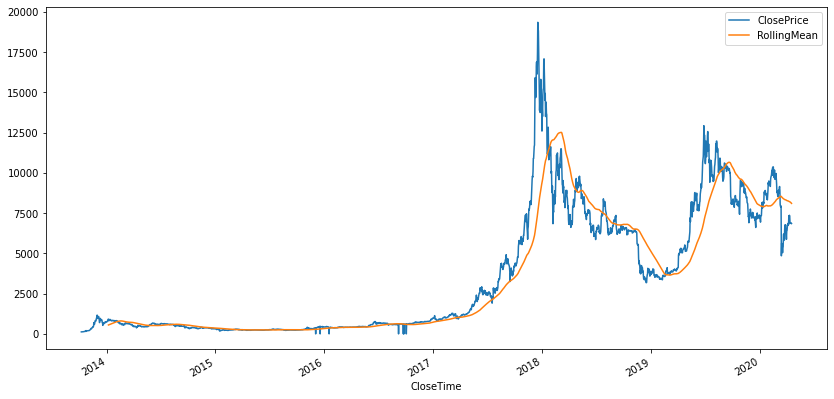

In [23]:
# Plot
daily_price.plot(figsize=(14,7))

## Calculate the day of the week

1. Get the data into a new clean data frame
2. Calculate the day of the week for each date
3. Sort the data by day of the week
4. Calculate average price for each day of the week
5. Plot data by day of the week, compared to the average of that day

In [88]:
# What's the day of the week
resp = requests.get(kraken_data, day_params)
data = resp.json()
dayofweek_df = pd.DataFrame(data['result'][day], columns=
    ['CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'])

In [89]:
dayofweek_df.drop(columns=['NA'], inplace=True)
dayofweek_df.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
0,1381190400,123.61,123.61000,123.61,123.61,0.1000
1,1381276800,123.61,124.19000,123.90,124.18,3.9916
2,1381363200,124.18,124.01687,123.84,123.84,2.8230
3,1381449600,123.84,125.86000,125.85,125.86,2.0000
4,1381622400,125.86,127.50000,127.00,127.00,4.0000


In [90]:
dayofweek_df['Date'] = pd.to_datetime(dayofweek_df['CloseTime'], unit='s')
dayofweek_df.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,Date
0,1381190400,123.61,123.61000,123.61,123.61,0.1000,2013-10-08
1,1381276800,123.61,124.19000,123.90,124.18,3.9916,2013-10-09
2,1381363200,124.18,124.01687,123.84,123.84,2.8230,2013-10-10
3,1381449600,123.84,125.86000,125.85,125.86,2.0000,2013-10-11
4,1381622400,125.86,127.50000,127.00,127.00,4.0000,2013-10-13


In [91]:
# Create day of week column
dayofweek_df['DayOfWeek'] = dayofweek_df['Date'].dt.day_name()
dayofweek_df.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,Date,DayOfWeek
0,1381190400,123.61,123.61000,123.61,123.61,0.1000,2013-10-08,Tuesday
1,1381276800,123.61,124.19000,123.90,124.18,3.9916,2013-10-09,Wednesday
2,1381363200,124.18,124.01687,123.84,123.84,2.8230,2013-10-10,Thursday
3,1381449600,123.84,125.86000,125.85,125.86,2.0000,2013-10-11,Friday
4,1381622400,125.86,127.50000,127.00,127.00,4.0000,2013-10-13,Sunday


In [92]:
# now set index to date
dayofweek_df.set_index('Date', inplace=True)
dayofweek_df.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,DayOfWeek
Date,,,,,,,
2013-10-08,1381190400,123.61,123.61000,123.61,123.61,0.1000,Tuesday
2013-10-09,1381276800,123.61,124.19000,123.90,124.18,3.9916,Wednesday
2013-10-10,1381363200,124.18,124.01687,123.84,123.84,2.8230,Thursday
2013-10-11,1381449600,123.84,125.86000,125.85,125.86,2.0000,Friday
2013-10-13,1381622400,125.86,127.50000,127.00,127.00,4.0000,Sunday


In [93]:
# Group by Day of Week

day_group_df = dayofweek_df[['DayOfWeek','ClosePrice']].copy()
day_group_df.head()

,DayOfWeek,ClosePrice
Date,,
2013-10-08,Tuesday,123.61
2013-10-09,Wednesday,124.18
2013-10-10,Thursday,123.84
2013-10-11,Friday,125.86
2013-10-13,Sunday,127.00


In [76]:
# Helps for ordering of day-of-week in plot
#days = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
#day_group_df['day'] = pd.Categorical(day_group_df['DayOfWeek'], #categories=days)
day_group_df.head()

,DayOfWeek,ClosePrice,day
Date,,,
2013-10-08,Tuesday,123.61,NaN
2013-10-09,Wednesday,124.18,NaN
2013-10-10,Thursday,123.84,NaN
2013-10-11,Friday,125.86,NaN
2013-10-13,Sunday,127.00,NaN


In [94]:
# Pass column I want to group by, then data to aggregate
average_price_by_day = day_group_df.groupby('DayOfWeek')['ClosePrice'].mean()

## Need a rolling mean of this!

In [95]:
average_price_by_day = day_group_df.groupby('DayOfWeek')['ClosePrice'].rolling(5).mean()
average_price_by_day

DayOfWeek  Date      
Friday     2013-10-11            NaN
           2013-10-18            NaN
           2013-10-25            NaN
           2013-11-01            NaN
           2013-11-08     190.896792
                            ...     
Wednesday  2020-03-18    8292.180000
           2020-03-25    7609.980000
           2020-04-01    7032.500000
           2020-04-08    6723.180000
           2020-04-15    6520.700000
Name: ClosePrice, Length: 2369, dtype: float64

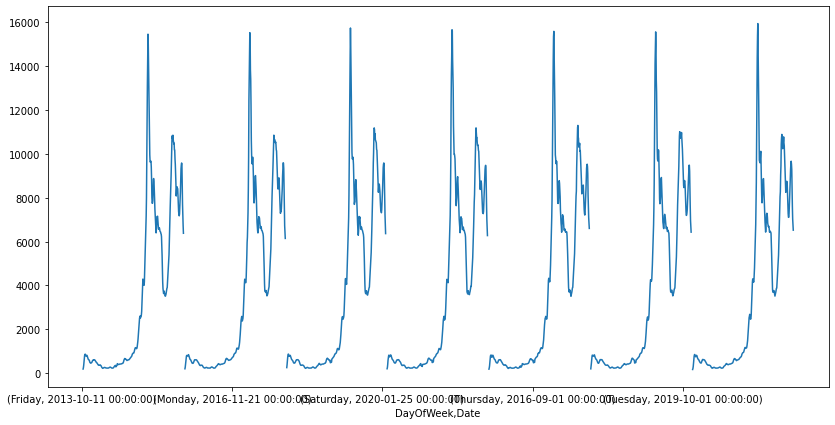

In [96]:
average_price_by_day.plot(figsize=(14,7))

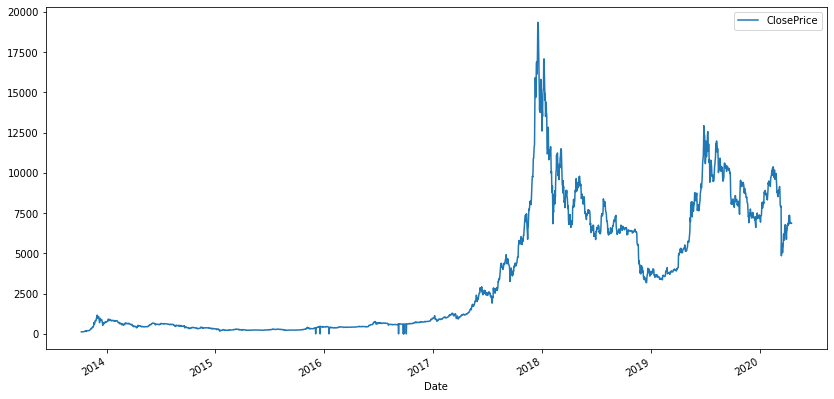

In [97]:
day_group_df.plot(figsize=(14,7))

In [98]:
# Ok let's scale down for now and just look at rolling average over the course of 2020
start_date = '01-01-2020'
end_date = '4-15-2020'

In [108]:
mask = (dayofweek_df.index > start_date) & (dayofweek_df.index <= end_date)

In [110]:
filtered = dayofweek_df.loc[mask]
filtered.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,DayOfWeek
Date,,,,,,,
2020-01-02,1577923200,7168.3,7235.0,7150.0,7174.4,1827.634894,Thursday
2020-01-03,1578009600,7174.4,7185.8,6915.0,6942.3,4057.331546,Friday
2020-01-04,1578096000,6943.4,7397.3,6860.0,7334.8,8120.491405,Saturday
2020-01-05,1578182400,7333.2,7396.4,7260.0,7350.2,2912.373131,Sunday
2020-01-06,1578268800,7350.2,7493.3,7301.1,7346.9,2904.093494,Monday


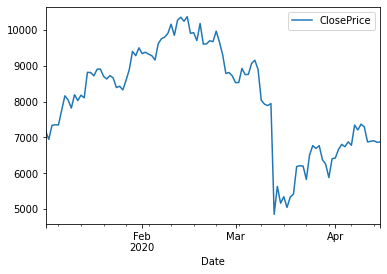

In [112]:
dayslol = filtered[['ClosePrice', 'DayOfWeek']]
dayslol.plot()

In [127]:
dayslol_group = dayslol.groupby('DayOfWeek')['ClosePrice'].mean()
dayslol_group

DayOfWeek
Friday       8050.060000
Monday       7965.620000
Saturday     8117.273333
Sunday       8017.886667
Thursday     8210.826667
Tuesday      8059.233333
Wednesday    8217.593333
Name: ClosePrice, dtype: float64

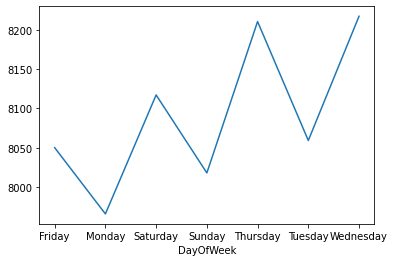

In [128]:
dayslol_group.plot()

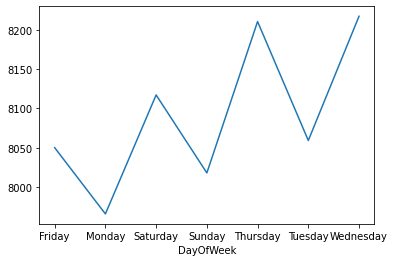

In [126]:
dayslol.groupby('DayOfWeek').mean().plot(kind='line', legend=None)

## Average Weekly Price, Per Week
Calculate the average weekly close price, per week
Plot